In [86]:
import json
import requests
import numpy as np
import matplotlib.pyplot as plt
import time

## LINESTRING2NDW SERVICE

This service provides traffic data from loop detectors. It covers most of the highways in the Netherlands.

In [87]:
linestring_fn = 'A4-1.txt'
with open (linestring_fn, 'r') as f:
    linestring = f.read()
linestring = json.loads(linestring)
postdata = {
    'service': 'linestring2ndw',
    'from_time': '04:00',
    'to_time': '22:00',
    'start_date': '2019-11-26',
    'linestring': linestring,
    'dostats': 0,
    'dotraveltime': 0
}

In [88]:
python_url='https://mirrors-ndw.citg.tudelft.nl/dataapi/service'

In [89]:
start = time.time()
res = requests.post(python_url, json=postdata, verify=False)
try:
    data = res.json()
except ValueError:
    print(res.text)
end = time.time()
print(end-start)

C:\Users\zahraeftekhar\.conda\envs\ODmatrices\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'mirrors-ndw.citg.tudelft.nl'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


16.90334677696228


In [66]:
import json
with open('data_A4_2019-11-26.json', 'w') as fp:
    json.dump(data, fp)

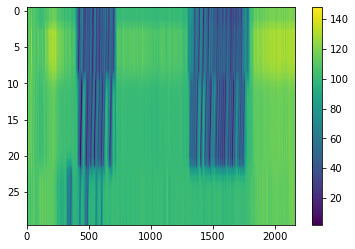

In [79]:
speed = np.array(data['data']['speed'])
speed = speed.astype(float)
speed[speed==99999] = np.NaN
plt.imshow(speed[80:110,:],  aspect='auto')
plt.colorbar()

In [90]:
data['data'].keys()

dict_keys(['flow', 'fromdate', 'labels', 'speed', 't', 'todate', 'x'])

In [94]:
import pandas as pd 
coordinatess = np.asarray(pd.DataFrame.from_dict(linestring['geometry']['coordinates']))
# .to_csv ('a4.CSV', index=False,header=True)
coordinatess[0]

array([52.08566,  4.4161 ])

In [97]:
import folium
from streamlit_folium import folium_static
import pandas as pd 
coordinatess = np.asarray(pd.DataFrame.from_dict(linestring['geometry']['coordinates']))
def create_basic_map():
    basic_map = folium.Map(location=coordinatess[0], tiles='openstreetmap', zoom_start=5)
    folium.Marker(coordinatess[0]).add_to(basic_map)
    return folium_static(basic_map, width=500, height=300)

ModuleNotFoundError: No module named 'streamlit_folium'